# Проект: анализ зарплат в России

В проекте мы будем пользоваться открытыми данными из официальных источников:


*   Сайт Росстата
*   Таблицы уровня инфляции в России


Вам предлагается проанализировать динамику уровня средних зарплат в разрезе по
видам экономической деятельности за последние 30 лет в России.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Первый этап

Скачайте данные о "Среднемесячной номинальной начисленной заработной плате
работников организаций по видам экономической деятельности в Российской Федерации за
2000-2023 гг." по ссылке

https://web.archive.org/web/20250524001439/https://rosstat.gov.ru/labor_market_employment_salaries

### обработка статистики по зарплате

In [ ]:
import pandas as pd

file = 'tab3-zpl_2024.xlsx'

df_2000_2016 = pd.read_excel(file, sheet_name='2000-2016 гг.', header=2)
print(df_2000_2016.columns)


# Данные за 2017-2024 (лист 2)
df_2017_2024 = pd.read_excel(file, sheet_name='с 2017 г.', header=4)

df_2000_2016.columns = [str(col) for col in df_2000_2016.columns]
df_2017_2024.columns = [str(col) for col in df_2017_2024.columns]

# отрасли в столбец, года — в строки
df_2000_2016_long = df_2000_2016.melt(id_vars=[df_2000_2016.columns[0]],
                                      var_name='Год',
                                      value_name='Зарплата')
df_2000_2016_long.rename(columns={df_2000_2016.columns[0]: 'Отрасль'}, inplace=True)

df_2017_2024_long = df_2017_2024.melt(id_vars=[df_2017_2024.columns[0]],
                                      var_name='Год',
                                      value_name='Зарплата')
df_2017_2024_long.rename(columns={df_2017_2024.columns[0]: 'Отрасль'}, inplace=True)

df_2000_2016_long.head()

Index(['Unnamed: 0',         2000,         2001,         2002,         2003,
               2004,         2005,         2006,         2007,         2008,
               2009,         2010,         2011,         2012,         2013,
               2014,         2015,         2016],
      dtype='object')


,Отрасль,Год,Зарплата
0,Всего по экономике,2000,2223.4
1,"Сельское хозяйство, охота и лесное хозяйство",2000,985.1
2,"Рыболовство, рыбоводство",2000,2845.6
3,Добыча полезных ископаемых,2000,5940.2
4,из нее:,2000,NaN


from matplotlib import pyplot as plt
_df_0['Зарплата'].plot(kind='hist', bins=20, title='Зарплата')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('Отрасль').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['Зарплата'].plot(kind='line', figsize=(8, 4), title='Зарплата')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_3['Отрасль'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_3, x='Зарплата', y='Отрасль', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# ключ — категория до 2017, значение — список категорий после 2017
mapping_dict = {
    "Сельское хозяйство, охота и лесное хозяйство":
        "растениеводство и животноводство, охота и предоставление соответствующих услуг в этих областях, лесоводство и лесозаготовки",
    "Рыболовство, рыбоводство":
        "рыболовство и рыбоводство",
    "добыча топливно-энергетических полезных ископаемых":
        "добыча угля, добыча нефти и природного газа",
    "добыча полезных ископаемых, кроме топливно-энергетических":
        "добыча металлических руд",
    "Обрабатывающие производства":
        "обрабатывающие производства",
    "производство пищевых продуктов, включая напитки, и табака":
        "производство пищевых продуктов, производство напитков, производство табачных изделий",
    "текстильное и швейное производство":
        "производство текстильных изделий, производство одежды",
    "производство кожи, изделий из кожи и производство обуви":
        "производство кожи и изделий из кожи",
    "обработка древесины и производство изделий из дерева":
        "обработка древесины и производство изделий из дерева и пробки, кроме мебели, производство изделий из соломки и материалов для плетения",
    "целлюлозно-бумажное производство; издательская и полиграфическая деятельность":
        "производство бумаги и бумажных изделий, деятельность полиграфическая и копирование носителей информации",
    "производство кокса и нефтепродуктов":
        "производство кокса и нефтепродуктов",
    "химическое производство":
        "производство химических веществ и химических продуктов",
    "производство резиновых и пластмассовых изделий":
        "производство резиновых и пластмассовых изделий",
    "производство прочих неметаллических минеральных продуктов":
        "производство прочей неметаллической минеральной продукции",
    "металлургическое производство и производство готовых металлических изделий":
        "производство металлургическое, производство готовых металлических изделий, кроме машин о оборудования",
    "производство машин и оборудования":
        "производство машин и оборудования, не включенных в другие группировки",
    "производство электрооборудования, электронного и оптического оборудования":
        "производство компьютеров, электронных и оптических изделий, производство электрического оборудования",
    "производство транспортных средств и оборудования":
        "производство автотранспортных средств, прицепов и полуприцепов, производство прочих транспортных средств и оборудования",
    "прочие производства":
        "производство мебели, производство прочих готовых изделий, ремонт и монтаж машин и оборудования",
    "Производство и распределение электроэнергии, газа и воды":
        "обеспечение электрической энергией, газом и паром; кондиционирование воздуха, водоснабжение; водоотведение, организация сбора и утилизации отходов, деятельность по ликвидации загрязнений",
    "Строительство":
        "строительство",
    "Оптовая и розничная торговля; ремонт автотранспортных средств, мотоциклов, бытовых изделий и предметов личного пользования":
        "торговля оптовая и розничная; ремонт автотранспортных средств и мотоциклов",
    "Гостиницы и рестораны":
        "деятельность гостиниц и предприятий общественного питания",
    "Транспорт и связь":
        "транспортировка и хранение, деятельность в области информации и связи",
    "из них связь":
        "деятельность в области информации и связи",
    "Финансовая деятельность":
        "деятельность финансовая и страховая",
    "Операции с недвижимым имуществом, аренда и предоставление услуг":
        "деятельность по операциям с недвижимым имуществом",
    "Государственное управление и обеспечение военной безопасности; социальное страхование":
        "государственное управление и обеспечение военной безопасности; социальное обеспечение",
    "Образование":
        "образование",
    "Здравоохранение и предоставление социальных услуг":
        "деятельность в области здравоохранения и социальных услуг",
    "Предоставление прочих коммунальных, социальных и персональных услуг":
        "деятельность в области культуры, спорта, организации досуга и развлечений",
}



new_only = [
    "производство лекарственных средств и материалов, применяемых в медицинских целях",
    "деятельность профессиональная,научная и техническая",
    "деятельность административная и сопутствующие дополнительные услуги"
    ]


In [ ]:
# переделаем названия отраслей чтобы склеить датасеты
def map_old_category(ot):
    for k in mapping_dict.keys():
        ot = ot.lower().replace('  ', ' ').replace('  ', ' ').strip()
        k1 = k.lower().replace('  ', ' ').replace('  ', ' ').strip()
        if ot in k1:
            return k.capitalize()
    return None  # те строки которые не участвуют в анализе (например: "из нее:")


df_2000_2016_long['Отрасль'] = df_2000_2016_long['Отрасль'].astype(str)
df_2000_2016_long['Категория'] = df_2000_2016_long['Отрасль'].apply(map_old_category)

df_2000_2016_clean = df_2000_2016_long.dropna(subset=['Категория'])[['Год', 'Категория', 'Зарплата']]
df_2000_2016_clean.head()


,Год,Категория,Зарплата
1,2000,"Сельское хозяйство, охота и лесное хозяйство",985.1
2,2000,"Рыболовство, рыбоводство",2845.6
3,2000,"Добыча полезных ископаемых, кроме топливно-эне...",5940.2
7,2000,Обрабатывающие производства,2365.2
10,2000,Текстильное и швейное производство,1214.8


In [ ]:
# переделаем названия отраслей чтобы склеить датасеты
def map_new_category(ot):
    for k, v in mapping_dict.items():
        ot = ot.lower().replace('  ', ' ').replace('  ', ' ').strip()
        v1 = v.lower().replace('  ', ' ').replace('  ', ' ').strip()
        if ot in v1:
            return k.capitalize()
    if ot in new_only:
        return ot.capitalize() # те которые есть только в новом датасете
    return None  # те строки которые не участвуют в анализе (например: "из нее:")

df_2017_2024_long['Отрасль'] = df_2017_2024_long['Отрасль'].astype(str)
df_2017_2024_long['Категория'] = df_2017_2024_long['Отрасль'].apply(map_new_category)

df_2017_2024_clean = df_2017_2024_long.dropna(subset=['Категория'])[['Год', 'Категория', 'Зарплата']]

df_2017_2024_clean.head()

,Год,Категория,Зарплата
3,2017,"Сельское хозяйство, охота и лесное хозяйство",23529.1
4,2017,"Сельское хозяйство, охота и лесное хозяйство",27616.6
5,2017,"Рыболовство, рыбоводство",68032.0
8,2017,Добыча топливно-энергетических полезных ископа...,53065.0
9,2017,Добыча топливно-энергетических полезных ископа...,104078.3


In [ ]:
df_all = pd.concat([df_2000_2016_clean, df_2017_2024_clean], ignore_index=True)

# объединяем то что посчитали по 2 раза
df_all_grouped = df_all.groupby(['Год', 'Категория']).agg({'Зарплата': 'mean'}).reset_index()
# я выбрала среднее тк это среднемесячная зарплата на 1 работника

# теперь добавить NaN там где данных не было (new_only до 2017)
all_years = sorted(df_all_grouped['Год'].unique())
all_categories = list(mapping_dict.keys()) + new_only
all_categories = [x.capitalize() for x in all_categories]

index = pd.MultiIndex.from_product([all_years, all_categories], names=['Год', 'Категория'])

df_salary = df_all_grouped.set_index(['Год', 'Категория']).reindex(index).reset_index()

df_salary

,Год,Категория,Зарплата
0,2000,"Сельское хозяйство, охота и лесное хозяйство",985.1
1,2000,"Рыболовство, рыбоводство",2845.6
2,2000,Добыча топливно-энергетических полезных ископа...,NaN
3,2000,"Добыча полезных ископаемых, кроме топливно-эне...",5940.2
4,2000,Обрабатывающие производства,2365.2
...,...,...,...
845,2024,Здравоохранение и предоставление социальных услуг,71735.1
846,2024,"Предоставление прочих коммунальных, социальных...",78502.8
847,2024,Производство лекарственных средств и материало...,116066.9
848,2024,"Деятельность профессиональная,научная и технич...",127206.7


In [ ]:
with open('salary_data_longer.csv', 'w') as file:
  pass

df_salary.to_csv('salary_data_longer.csv', index=False, encoding='utf-8')

### открытие из файлов

In [ ]:
# открытие данных из файла
with open('salary_data_longer.csv', encoding='utf-8') as file:
  df_salary = pd.read_csv(file)

df_salary

,Год,Категория,Зарплата
0,2000,"Сельское хозяйство, охота и лесное хозяйство",985.1
1,2000,"Рыболовство, рыбоводство",2845.6
2,2000,Добыча топливно-энергетических полезных ископа...,NaN
3,2000,"Добыча полезных ископаемых, кроме топливно-эне...",5940.2
4,2000,Обрабатывающие производства,2365.2
...,...,...,...
845,2024,Здравоохранение и предоставление социальных услуг,71735.1
846,2024,"Предоставление прочих коммунальных, социальных...",78502.8
847,2024,Производство лекарственных средств и материало...,116066.9
848,2024,"Деятельность профессиональная,научная и технич...",127206.7


Скачайте данные об уровне инфляции в стране по ссылке

In [ ]:
df_inf = pd.read_csv("inflation_total_2000_2024.csv")
df_inf.head()

,Год,Инфляция
0,2024,9.51
1,2023,7.42
2,2022,11.92
3,2021,8.39
4,2020,4.91


Выберите 2-3 вида экономической деятельности, наиболее интересные Вам. Постройте
графики изменения зарплаты по годам для этих видов экономической деятельности.
Сделайте выводы

In [ ]:
df_salary['Категория'].unique()
# Образование
# Здравоохранение и предоставление социальных услуг
# Финансовая деятельность

array(['Сельское хозяйство, охота и лесное хозяйство',
       'Рыболовство, рыбоводство',
       'Добыча топливно-энергетических полезных ископаемых',
       'Добыча полезных ископаемых, кроме топливно-энергетических',
       'Обрабатывающие производства',
       'Производство пищевых продуктов, включая напитки, и табака',
       'Текстильное и швейное производство',
       'Производство кожи, изделий из кожи и производство обуви',
       'Обработка древесины и производство изделий из дерева',
       'Целлюлозно-бумажное производство; издательская и полиграфическая деятельность',
       'Производство кокса и нефтепродуктов', 'Химическое производство',
       'Производство резиновых и пластмассовых изделий',
       'Производство прочих неметаллических минеральных продуктов',
       'Металлургическое производство и производство готовых металлических изделий',
       'Производство машин и оборудования',
       'Производство электрооборудования, электронного и оптического оборудования',
  

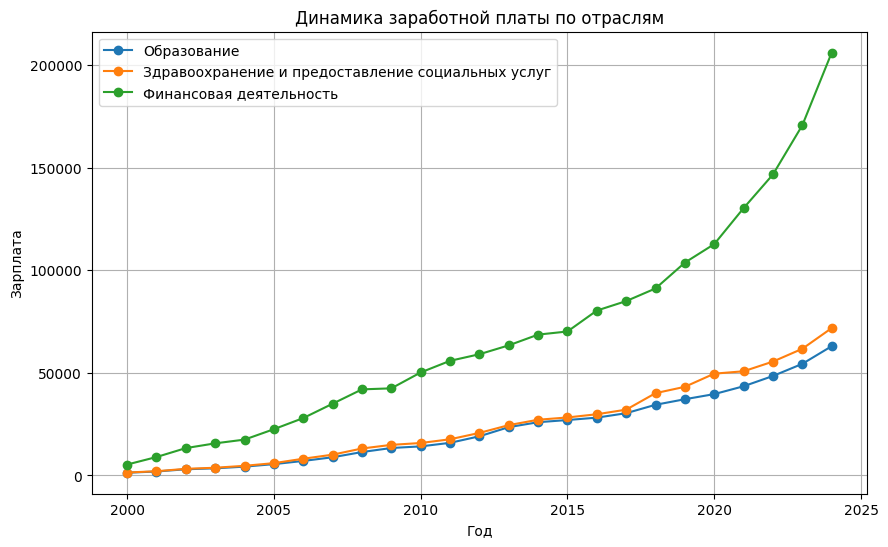

In [ ]:
categories = ['Образование', 'Здравоохранение и предоставление социальных услуг', 'Финансовая деятельность']

plt.figure(figsize=(10, 6))
for category in categories:
    subset = df_salary[df_salary['Категория'] == category].dropna(subset=['Зарплата'])
    plt.plot(subset['Год'], subset['Зарплата'], marker='o', label=category)

plt.title('Динамика заработной платы по отраслям')
plt.xlabel('Год')
plt.ylabel('Зарплата')
plt.legend()
plt.grid(True)
plt.show()

**Анализ**



>  
Зарплаты в здравоохранении и образовании растут гораздо медленнее чем зарплаты в финансовой деятельности. Грустно, но что же. Здравоохранение вроде растет чуть-чуть быстрее образования, но надо проверить на стат значимость.

 > Номинально, зарплаты все растут и растут. Классно! Но сейчас мы посмотрим на инфляцию :))

Пересчитайте средние зарплаты с учетом уровня инфляции и сравните, как влияет инфляция
на изменение зарплаты по сравнению с предыдущим годом

In [ ]:
# надо посчитать ИПЦ по экономической формуле (индекс, потом накопление от кода к году)
df_inf['ИПЦ'] = 1 + df_inf['Инфляция'] / 100
df_inf = df_inf.sort_values('Год')
df_inf['Кумулятивный_ИПЦ'] = df_inf['ИПЦ'].cumprod()
df_inf

,Год,Инфляция,ИПЦ,Кумулятивный_ИПЦ
24,2000,20.20,1.2020,1.202000
23,2001,18.58,1.1858,1.425332
22,2002,15.06,1.1506,1.639987
21,2003,11.99,1.1199,1.836621
20,2004,11.74,1.1174,2.052240
19,2005,10.91,1.1091,2.276140
18,2006,9.00,1.0900,2.480992
17,2007,11.87,1.1187,2.775486
16,2008,13.28,1.1328,3.144071
15,2009,8.80,1.0880,3.420749


In [ ]:
df_salary = df_salary.merge(df_inf[['Год', 'Кумулятивный_ИПЦ']], on='Год', how='left')
df_salary['Реальная зарплата'] = df_salary['Зарплата'] / df_salary['Кумулятивный_ИПЦ']
df_salary

,Год,Категория,Зарплата,Кумулятивный_ИПЦ,Реальная зарплата
0,2000,"Сельское хозяйство, охота и лесное хозяйство",985.1,1.202000,819.550749
1,2000,"Рыболовство, рыбоводство",2845.6,1.202000,2367.387687
2,2000,Добыча топливно-энергетических полезных ископа...,NaN,1.202000,NaN
3,2000,"Добыча полезных ископаемых, кроме топливно-эне...",5940.2,1.202000,4941.930116
4,2000,Обрабатывающие производства,2365.2,1.202000,1967.720466
...,...,...,...,...,...
845,2024,Здравоохранение и предоставление социальных услуг,71735.1,9.788035,7328.856075
846,2024,"Предоставление прочих коммунальных, социальных...",78502.8,9.788035,8020.281880
847,2024,Производство лекарственных средств и материало...,116066.9,9.788035,11858.038885
848,2024,"Деятельность профессиональная,научная и технич...",127206.7,9.788035,12996.142699


Выберите подходящие визуализации и отобразите динамику изменения реальных зарплат с
учетом инфляции. Сделайте выводы!

In [ ]:
# я посчитаю для каждой категории зарплату, компенсирующую инфляцию.
# то есть какой она должна была бы быть чтобы сохранить покупательскую способность работника с 2000 года

# стартовая точка этой линии - зарплата за самый ранний год в датасете
baseline_years = df_salary[df_salary['Зарплата'].notna()].groupby('Категория')['Год'].min().to_dict()

baseline_salaries = {}
for category, year in baseline_years.items():
    salary = df_salary.loc[(df_salary['Категория'] == category) & (df_salary['Год'] == year), 'Зарплата'].values[0]
    baseline_salaries[category] = salary

def compute_baseline(row):
    category = row['Категория']
    base_year = baseline_years[category]

    # Если год раньше базового — бейслайна нет
    if row['Год'] < base_year:
        return None

    ipc_now = row['Кумулятивный_ИПЦ']
    ipc_base = df_salary.loc[
        (df_salary['Категория'] == category) &
        (df_salary['Год'] == base_year),
        'Кумулятивный_ИПЦ'
    ].values[0]

    # Стартовая зарплата
    salary_base = baseline_salaries[category]

    # зарплата которая должна была быть в этом году
    salary_now = salary_base * (ipc_now / ipc_base) # по формуле из пропорции
    return salary_now

df_salary['Базовая зарплата'] = df_salary.apply(compute_baseline, axis=1)

,Год,Категория,Зарплата,Кумулятивный_ИПЦ,Реальная зарплата,Базовая зарплата
0,2000,"Сельское хозяйство, охота и лесное хозяйство",985.1,1.202000,819.550749,985.100000
1,2000,"Рыболовство, рыбоводство",2845.6,1.202000,2367.387687,2845.600000
2,2000,Добыча топливно-энергетических полезных ископа...,NaN,1.202000,NaN,NaN
3,2000,"Добыча полезных ископаемых, кроме топливно-эне...",5940.2,1.202000,4941.930116,5940.200000
4,2000,Обрабатывающие производства,2365.2,1.202000,1967.720466,2365.200000
...,...,...,...,...,...,...
845,2024,Здравоохранение и предоставление социальных услуг,71735.1,9.788035,7328.856075,10857.227210
846,2024,"Предоставление прочих коммунальных, социальных...",78502.8,9.788035,8020.281880,12605.555930
847,2024,Производство лекарственных средств и материало...,116066.9,9.788035,11858.038885,87287.468163
848,2024,"Деятельность профессиональная,научная и технич...",127206.7,9.788035,12996.142699,91980.367012


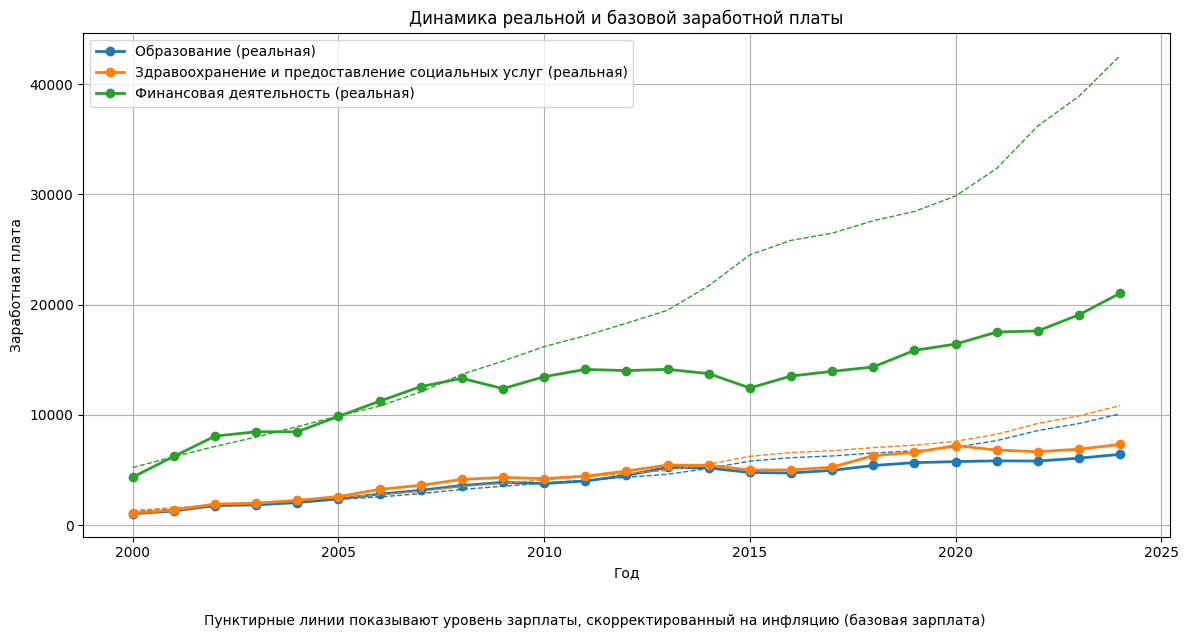

In [ ]:
plt.figure(figsize=(12, 6))

# заранее создадим colormap
colors = plt.cm.tab10.colors

for idx, category in enumerate(categories):
    subset = df_salary[df_salary['Категория'] == category]

    color = colors[idx % len(colors)]

    # Реальная зарплата — жирная линия с маркерами
    plt.plot(subset['Год'], subset['Реальная зарплата'], label=f'{category} (реальная)',
             marker='o', linewidth=2, color=color)

    # Базовая зарплата — пунктирная линия того же цвета
    plt.plot(subset['Год'], subset['Базовая зарплата'], linestyle='--', linewidth=1, color=color)

plt.title('Динамика реальной и базовой заработной платы')
plt.xlabel('Год')
plt.ylabel('Заработная плата')
plt.legend()
plt.grid(True)
plt.figtext(0.5, -0.05,
             'Пунктирные линии показывают уровень зарплаты, скорректированный на инфляцию (базовая зарплата)',
             ha='center', fontsize=10)
plt.tight_layout()
plt.show()


**Анализ**



> Базовая зарплата - зарплата, которую бы имел человек, если бы его зарплата поднималась в соответствии с инфляцией начиная с 2000 года и спрос на его услуги никак не менялся.



*Образование*: в 2000 году были бедные, в 2015 году резко потеряли платежеспособность (реальная зарплата упала, хотя, как показывает базовая зарплата, ее должны были поднять в соответствии с инфляцией), к 2025 реальная зарплата не изменялась, хотя должна была расти параллельно базовой

*Здравоохранение*: та же тенденция, что и образование, но в 2020 году внезапно нагнали базовую зарплату. Возможно, в ковид врачи были просто очень нужны. Но потом в 2021 зарплата снова отстала от базовой

*Финансы*: до 2008 года реальная зарплата расла рядом с базовой, то есть покупательная способность финансистов не менялась. Потом в 2009-2018 году реальная зарплата не менялась или уменшалась, а в 2019 кое-как начала расти обратно. Темп роста реальной зп в 2019-2024 примерно соответствие темпу роста который требовался в 2009-2014 годах, но инфляция уже слишком сильно подняла цены и теперь у финансистов сильно ухудшилась покупательная способность

In [ ]:
df_salary['Зарплата'].max()

205974.0

In [ ]:
with open('salary_data_longer_full.csv', 'w') as file:
  df_salary.to_csv('salary_data_longer_full.csv', index=False, encoding='utf-8')

## Второй этап

скачать метаданные и создать из них файлы

In [ ]:
# данные по годам с росстата

migration_data = {
    2000: [2662329, 2420574],
    2001: [2334034, 2252253],
    2002: [2201914, 2114765],
    2003: [2168168, 2124284],
    2004: [2117434, 2076159],
    2005: [2088639, 1981207],
    2006: [2122071, 1989752],
    2007: [2284936, 2044993],
    2008: [2215945, 1973839],
    2009: [1987598, 1740149],
    2010: [2102304, 1794496],
    2011: [3415055, 3095294],
    2012: [4196143, 3901123],
    2013: [4496861, 4204082],
    2014: [4663427, 4363437],
    2015: [4734523, 4444849],
    2016: [4706441, 4444365],
    2017: [4773500, 4561622],
    2018: [4911566, 4786712],
    2019: [4749769, 4464666],
    2020: [4120743, 4014269],
    2021: [4277442, 3847540],
    2022: [4195579, 4133662],
    2023: [4051437, 3847808],
    2024: [None, None]  # 2024 пока нет
}


In [ ]:
# данные с росстата
gdp_per_capita = {
    2000: 49834.9,
    2001: 61267.3,
    2002: 74535.8,
    2003: 91312.5,
    2004: 118189.1,
    2005: 150571.0,
    2006: 188166.9,
    2007: 232817.4,
    2008: 289170.3,
    2009: 271787.1,
    2010: 324177.2,
    2011: 420324.1,
    2012: 474990.8,
    2013: 507530.2,
    2014: 539424.1,
    2015: 565361.8,
    2016: 580916.0,
    2017: 621870.5,
    2018: 702627.7,
    2019: 741097.4,
    2020: 728860.2,
    2021: 915156.8,
    2022: 1069708.4,
    2023: 1205841.9,
    2024: 1376477.9
}


In [ ]:
# https://ru.myfin.by/currency/cb-rf-archive/usd
usd_rub = {
    2000: 28.1150,
    2001: 29.1682,
    2002: 31.3474,
    2003: 30.6877,
    2004: 28.8150,
    2005: 28.2864,
    2006: 27.1852,
    2007: 25.5770,
    2008: 24.8553,
    2009: 31.7231,
    2010: 30.3692,
    2011: 29.3874,
    2012: 31.0930,
    2013: 31.8480,
    2014: 38.4217,
    2015: 60.9579,
    2016: 67.0349,
    2017: 58.3529,
    2018: 62.7078,
    2019: 64.7362,
    2020: 72.1464,
    2021: 73.6541,
    2022: 68.5494,
    2023: 85.2466,
    2024: 92.5652
}


In [ ]:
# https://wciom.ru/analytical-reviews/analiticheskii-obzor/schaste-v-rossii-monitoring-16042025
happiness_index = {
    2008: 62.0,
    2009: 49.5,
    2010: 51.5,
    2011: 41.5,
    2012: 59.0,
    2013: 59.0,
    2014: 61.5,
    2015: 67.0,
    2016: 67.0,
    2017: 72.0,
    2018: 72.0,
    2019: 69.5,
    2020: 66.5,
    2021: 67.5,
    2022: 67.0,
    2023: 66.5,
    2024: 66.0
}

In [ ]:
inflation_df = pd.read_csv('inflation_total_2000_2024.csv')
inflation_dict = dict(zip(inflation_df['Год'], inflation_df['Инфляция']))

years = list(range(2000, 2025))

data = []

for year in years:
    infl = inflation_dict.get(year)
    gdp = gdp_per_capita.get(year)
    usd = usd_rub.get(year)
    migration = migration_data.get(year, [None, None])
    happiness = happiness_index.get(year)

    data.append({
        'Год': year,
        'Инфляция': infl,
        'ВВП на душу': gdp,
        'USD': usd,
        'Прибывшие': migration[0],
        'Уехавшие': migration[1],
        'Индекс счастья': happiness
    })

df = pd.DataFrame(data)
df.to_csv('macro_data.csv', index=False, encoding='utf-8-sig')
